# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

In this lab you will: 

- Use Lasso and Ridge regression with scikit-learn 
- Compare and contrast Lasso, Ridge and non-regularized regression 

## Housing Prices Data

Let's look at yet another house pricing dataset: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at `.info()` of the data: 

In [2]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- First, split the data into `X` (predictor) and `y` (target) variables 
- Split the data into 75-25 training-test sets. Set the `random_state` to 10 
- Remove all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cont` and `X_test_cont`, respectively 

In [3]:
# Create X and y
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Remove "object"-type features from X
cont_features = df.select_dtypes(exclude=['object'])

# Remove "object"-type features from X_train and X_test
X_train_cont = X_train.select_dtypes(exclude=['object'])
X_test_cont = X_test.select_dtypes(exclude=['object'])

## Let's use this data to build a first naive linear regression model

- Fill the missing values in data using median of the columns (use [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) 
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [4]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with median using SimpleImputer
impute = SimpleImputer(strategy='median')
X_train_imputed = impute.fit_transform(X_train_cont)
X_test_imputed = impute.transform(X_test_cont)

# Fit the model and print R2 and MSE for training and test sets
linreg = LinearRegression().fit(X_train_imputed, y_train)

# Print R2 and MSE for training and test sets
print("Train R_squared:", linreg.score(X_train_imputed, y_train))
print("Test R_squared:", linreg.score(X_test_imputed, y_test))
print("Train MSE:", mean_squared_error(y_train, linreg.predict(X_train_imputed)))
print("Test MSE:", mean_squared_error(y_test, linreg.predict(X_test_imputed)))

Train R_squared: 0.8069714678400263
Test R_squared: 0.8203264293698922
Train MSE: 1212415985.708407
Test MSE: 1146350639.8805757


## Normalize your data

- Normalize your data using a `StandardScalar`  
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
ss = StandardScaler()
X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
X_test_imputed_scaled = ss.transform(X_test_imputed)

# Fit the model
linreg_norm = LinearRegression().fit(X_train_imputed_scaled, y_train)

# Print R2 and MSE for training and test sets
print("Train R_squared:", linreg_norm.score(X_train_imputed_scaled, y_train))
print("Test R_squared:", linreg_norm.score(X_test_imputed_scaled, y_test))
print("Train MSE:", mean_squared_error(y_train, linreg_norm.predict(X_train_imputed_scaled)))
print("Test MSE:", mean_squared_error(y_test, linreg_norm.predict(X_test_imputed_scaled)))

Train R_squared: 0.8070329651129636
Test R_squared: 0.8202835099995736
Train MSE: 1212029720.1343372
Test MSE: 1146624473.4079857


## Include categorical variables

The above models didn't include categorical variables so far, let's include them! 


- Include all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cat` and `X_test_cat`, respectively 
- Fill missing values in all these columns with the string `'missing'` 

In [6]:
# Create X_cat which contains only the categorical variables
#features_cat = None
X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

In [7]:
# Fill missing values with the string 'missing'
X_train_cat.fillna('missing', inplace=True)
X_test_cat.fillna('missing', inplace=True)

- One-hot encode all these categorical columns using `OneHotEncoder` 
- Transform the training and test DataFrames (`X_train_cat`) and (`X_test_cat`) 
- Run the given code to convert these transformed features into DataFrames 

In [8]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform training and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)
print(type(X_train_ohe))

# Convert these columns into a DataFrame
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

<class 'scipy.sparse.csr.csr_matrix'>


- Combine `X_train_imputed_scaled` and `cat_train_df` into a single DataFrame  
- Similarly, combine `X_test_imputed_scaled` and `cat_test_df` into a single DataFrame 

In [9]:
type(X_train_imputed_scaled)

numpy.ndarray

In [10]:
pd.DataFrame(X_train_imputed_scaled, columns=X_train_cont.columns).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.375465,-0.868555,-0.020790,-0.045149,0.639596,-0.525371,1.075842,0.927822,0.344734,-0.954564,...,0.255948,-0.767076,-0.710015,-0.353939,-0.119925,-0.26839,-0.073427,-0.091508,-1.221204,1.636312
1,1.646800,3.097630,-0.455243,0.061269,-1.551303,0.386327,-2.868883,-1.700933,-0.570404,-0.958883,...,0.387519,-0.767076,-0.710015,1.494842,-0.119925,-0.26839,-0.073427,-0.091508,-0.854139,1.636312
2,1.541995,0.064665,0.196436,-0.083475,0.639596,0.386327,0.876949,0.635738,-0.570404,1.146352,...,0.495594,1.261706,1.827116,-0.353939,-0.119925,-0.26839,-0.073427,-0.091508,-0.120009,-1.376318
3,-1.316331,2.397715,-1.150367,-0.488028,0.639596,1.298025,0.512310,0.100251,-0.570404,0.109929,...,0.124378,2.769260,-0.187665,-0.353939,-0.119925,-0.26839,-0.073427,-0.091508,-0.120009,-1.376318
4,0.203346,-0.868555,0.326772,-0.047972,-0.090704,0.386327,0.081374,0.684419,-0.031126,0.472677,...,0.030399,1.357933,-0.710015,-0.353939,-0.119925,-0.26839,14.774354,-0.091508,-1.955334,-1.376318


In [11]:
# Your code here
X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled, columns=X_train_cont.columns), 
                         cat_train_df], 
                        axis=1)
X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled, columns=X_test_cont.columns), 
                        cat_test_df], 
                       axis=1)

Now build a linear regression model using all the features (`X_train_all`). Also, print the R-squared and the MSE for both the training and test sets. 

In [12]:
# Your code here
linreg_all = LinearRegression().fit(X_train_all, y_train)

print("Train R_squared:", linreg_all.score(X_train_all, y_train))
print("Test R_squared:", linreg_all.score(X_test_all, y_test))
print("Train MSE:", mean_squared_error(y_train, linreg_all.predict(X_train_all)))
print("Test MSE:", mean_squared_error(y_test, linreg_all.predict(X_test_all)))

Train R_squared: 0.9359963236812183
Test R_squared: -2.939897198618299e+20
Train MSE: 402008342.7287671
Test MSE: 1.8757088329687063e+30


Notice the severe overfitting above; our training R-squared is very high, but the test R-squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables, `X_train_all`) to build two models - one each for Lasso and Ridge regression. Each time, look at R-squared and MSE. 

## Lasso

#### With default parameter (alpha = 1)

In [17]:
# Your code here
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_all, y_train)

print("Train R_squared:", lasso.score(X_train_all, y_train))
print("Test R_squared:", lasso.score(X_test_all, y_test))
print("Train MSE:", mean_squared_error(y_train, lasso.predict(X_train_all)))
print("Test MSE:", mean_squared_error(y_test, lasso.predict(X_test_all)))

Train R_squared: 0.9359681086176651
Test R_squared: 0.888684112594205
Train MSE: 402185562.09476894
Test MSE: 710215967.2621554


#### With a higher regularization parameter (alpha = 10)

In [18]:
# Your code here
lasso2 = Lasso(alpha=10).fit(X_train_all, y_train)

print("Train R_squared:", lasso2.score(X_train_all, y_train))
print("Test R_squared:", lasso2.score(X_test_all, y_test))
print("Train MSE:", mean_squared_error(y_train, lasso2.predict(X_train_all)))
print("Test MSE:", mean_squared_error(y_test, lasso2.predict(X_test_all)))

Train R_squared: 0.9343826511712741
Test R_squared: 0.8966777526569275
Train MSE: 412143851.32359606
Test MSE: 659215063.9643531


## Ridge

#### With default parameter (alpha = 1)

In [19]:
# Your code here
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_all, y_train)

print("Train R_squared:", ridge.score(X_train_all, y_train))
print("Test R_squared:", ridge.score(X_test_all, y_test))
print("Train MSE:", mean_squared_error(y_train, ridge.predict(X_train_all)))
print("Test MSE:", mean_squared_error(y_test, ridge.predict(X_test_all)))

Train R_squared: 0.9231940244796031
Test R_squared: 0.884233048544421
Train MSE: 482419834.3987997
Test MSE: 738614579.8334152


#### With default parameter (alpha = 10)

In [20]:
# Your code here
ridge2 = Ridge(alpha=10).fit(X_train_all, y_train)

print("Train R_squared:", ridge2.score(X_train_all, y_train))
print("Test R_squared:", ridge2.score(X_test_all, y_test))
print("Train MSE:", mean_squared_error(y_train, ridge2.predict(X_train_all)))
print("Test MSE:", mean_squared_error(y_test, ridge2.predict(X_test_all)))

Train R_squared: 0.8990002650425939
Test R_squared: 0.8834542222982165
Train MSE: 634381310.5991352
Test MSE: 743583635.452232


## Compare the metrics    

Write your conclusions here: 
_________________________________
The best performance considering both the test and train set was achieved through the Lasso with alpha 10. This is likely due to the fact that Lasso is good for eliminating needless features, and thus best preventing overfitting. The Ridge regressions also far outperformed the unpenalized linear model, thanks to the regularization, but did not match the level of performance seen in the Lasso regressions.

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Use 10**(-10) as an estimate that is very close to 0. 

In [22]:
# Number of Ridge params almost zero
print("Number of parameters near zero in Ridge with alpha = 1:", 
      sum(abs(ridge.coef_) < 10e-10)
     )
print("Number of parameters near zero in Ridge with alpha = 10:", 
      sum(abs(ridge2.coef_) < 10e-10)
     )

Number of parameters near zero in Ridge with alpha = 1: 0
Number of parameters near zero in Ridge with alpha = 10: 0


In [25]:
# Number of Lasso params almost zero
print("Number of parameters near zero in Lasso with alpha = 1:",
      sum(abs(lasso.coef_) < 10e-10)
     )
print("Number of parameters near zero in Lasso with alpha = 10:",
      sum(abs(lasso2.coef_) < 10e-10)
     )

Number of parameters near zero in Lasso with alpha = 1: 35
Number of parameters near zero in Lasso with alpha = 10: 77


In [28]:
print("Total number of parameters:", len(lasso.coef_))
print("Percent removed from lasso with alpha = 1:", sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_))
print("Percent removed from lasso with alpha = 10:", sum(abs(lasso2.coef_) < 10**(-10))/ len(lasso2.coef_))

Total number of parameters: 296
Percent removed from lasso with alpha = 1: 0.11824324324324324
Percent removed from lasso with alpha = 10: 0.26013513513513514


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

## Put it all together

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test DataFrames with all of our preprocessed features along with training and test targets. 

In [29]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test DataFrames with targets'''
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    
    # Train-test split (75-25), set seed to 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    # Remove "object"-type features and SalesPrice from X
    X_train_cont = X_train.select_dtypes(exclude=['object'])
    X_test_cont = X_test.select_dtypes(exclude=['object'])

    # Impute missing values with median using SimpleImputer
    from sklearn.impute import SimpleImputer
    
    impute = SimpleImputer(strategy='median')
    X_train_imputed = impute.fit_transform(X_train_cont)
    X_test_imputed = impute.transform(X_test_cont)

    # Scale the train and test data
    from sklearn.preprocessing import StandardScaler

    ss = StandardScaler()
    X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
    X_test_imputed_scaled = ss.transform(X_test_imputed)

    # Create X_cat which contains only the categorical variables
    X_train_cat = X_train.select_dtypes(include=['object'])
    X_test_cat = X_test.select_dtypes(include=['object'])

    # Fill nans with a value indicating that that it is missing
    X_train_cat.fillna('missing', inplace=True)
    X_test_cat.fillna('missing', inplace=True)

    # OneHotEncode Categorical variables
    from sklearn.preprocessing import OneHotEncoder

    ohe = OneHotEncoder(handle_unknown='ignore')
    X_train_ohe = ohe.fit_transform(X_train_cat)
    X_test_ohe = ohe.transform(X_test_cat)
    
    # Combine categorical and continuous features into the final dataframe
    X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled, columns=X_train_cont.columns), 
                             cat_train_df], 
                            axis=1)
    X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled, columns=X_test_cont.columns), 
                            cat_test_df], 
                           axis=1)
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the training and test error to find optimal alpha values

Earlier we tested two values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

In [30]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 40


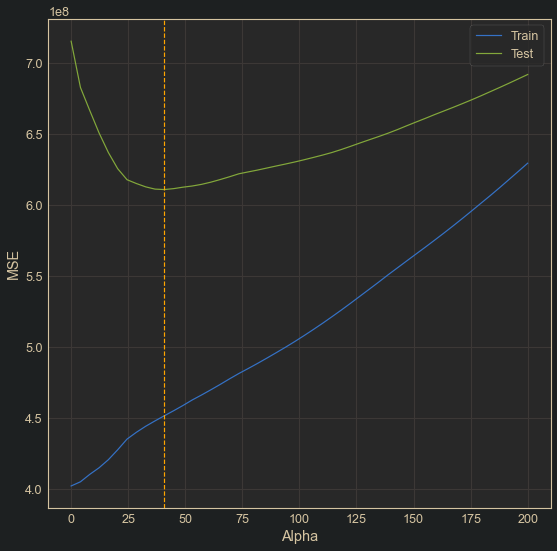

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

fig, ax = plt.subplots(figsize=(9,9))
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='orange', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

In [33]:
lasso = Lasso(alpha=40).fit(X_train_all, y_train)

print("Train R_squared:", lasso.score(X_train_all, y_train))
print("Test R_squared:", lasso.score(X_test_all, y_test))
print("Train MSE:", mean_squared_error(y_train, lasso.predict(X_train_all)))
print("Test MSE:", mean_squared_error(y_test, lasso.predict(X_test_all)))

Train R_squared: 0.9282328269651914
Test R_squared: 0.9042421353013819
Train MSE: 450771017.43897545
Test MSE: 610952902.4546697


Take a look at this graph of our training and test MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Summary

Well done! You now know how to build Lasso and Ridge regression models, use them for feature selection and find an optimal value for $\text{alpha}$. 